## Import Packages

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

## Prepare Data

In [2]:
df_org = pd.read_csv("insurance.csv")
df_org.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df_org.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df_org.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df = df_org.copy()

## Handle Missing Data 

In [6]:
df.isna().sum()/len(df)*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
print(df['sex'].unique())
print(df['region'].unique())
print(df['smoker'].unique())

['female' 'male']
['southwest' 'southeast' 'northwest' 'northeast']
['yes' 'no']


In [9]:
df= df.dropna(subset = ['age', 'bmi','children', 'charges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Categotical Encoding

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
print(df['sex'].unique())
print(df['region'].unique())
print(df['smoker'].unique())

['female' 'male']
['southwest' 'southeast' 'northwest' 'northeast']
['yes' 'no']


In [12]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder

# sex_encoder = LabelEncoder().fit(['female', 'male'])
sex_encoder = LabelEncoder().fit(df['sex'])

# region_encoder = LabelEncoder().fit(['southwest', 'southeast', 'northwest','northeast'])
region_encoder = LabelEncoder().fit(df['region'])

# smoker_encoder = LabelEncoder().fit(['yes', 'no'])
smoker_encoder = LabelEncoder().fit(df['smoker'])

In [13]:
sex_encoder.classes_

array(['female', 'male'], dtype=object)

In [14]:
#Encode categorical features
df['sex'] = sex_encoder.transform(df['sex'])
df['region'] = region_encoder.transform(df['region'])
df['smoker'] = smoker_encoder.transform(df['smoker'])

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Train/Test Data Split

In [16]:
X = df.drop('smoker', axis=1)
y = df['smoker']

In [17]:
# Split data into features and target
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Trining / Create Model using KNeighborsClassifier

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('classifier', KNeighborsClassifier())  # You can replace this with any other classifier
])

# Define the parameter grid to search
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9 , 11 ,13],  # Example values for 'n_neighbors'
    # Add more hyperparameters to search and their possible values
    # 'classifier__parameter_name': [value1, value2, ...],
}

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # You can adjust cv (cross-validation) as needed

# Fit the pipeline with GridSearchCV
grid_search.fit(X_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Now you can use the best estimator for predictions

In [19]:
### Use the Best Parameter

In [20]:
# Define the pipeline
model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # You can replace this with any other classifier
])

# Fit the pipeline
model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

## Testing / Evaluation

              precision    recall  f1-score   support

           0     0.9717    0.9626    0.9671       214
           1     0.8571    0.8889    0.8727        54

    accuracy                         0.9478       268
   macro avg     0.9144    0.9258    0.9199       268
weighted avg     0.9486    0.9478    0.9481       268



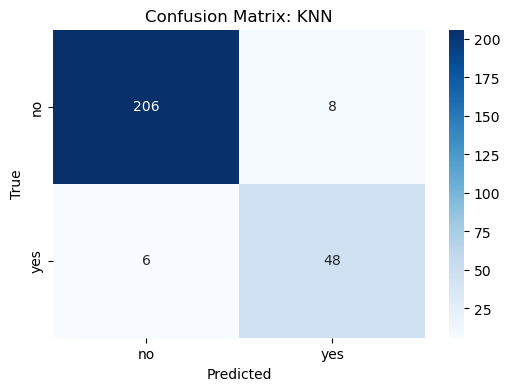

In [21]:
# Make predictions
y_pred = model.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=smoker_encoder.inverse_transform(model.named_steps['classifier'].classes_),
            yticklabels=smoker_encoder.inverse_transform(model.named_steps['classifier'].classes_))
plt.title('Confusion Matrix: KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_knn.png')

plt.show()

## Save Model and etc.

In [22]:
# Create a tuple or any container object with your variables
data_to_save = (model, smoker_encoder, region_encoder ,sex_encoder)

# Open a file in binary write mode
with open('knn_isSmoker.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

## Load Model and Prediction

Kernel -> Restart Kernel..

In [23]:
import pickle;
import pandas as pd 

with open('knn_isSmoker.pkl', 'rb') as file:
    # Load the data from the file
    model, smoker_encoder, region_encoder ,sex_encoder = pickle.load(file)

### New data

In [24]:
# age sex	bmi	children	region	charges

x_new =  pd.DataFrame() 
x_new['age'] = [25]
x_new['sex'] = ['male']
x_new['bmi'] = [22]
x_new['children'] = [2]
x_new['region'] = ['northwest']
x_new['charges'] = [4440.46200]

### Categorical Data Encoding

In [25]:
x_new['sex'] = sex_encoder.transform(x_new['sex'])
x_new['region'] = region_encoder.transform(x_new['region'])

### Predicting

In [26]:
y_pred_new = model.predict(x_new)

result = smoker_encoder.inverse_transform(y_pred_new) 

print('Predicted is smokers: ', result)

Predicted is smokers:  ['no']


## Create predict_knn_smoker.py for Running with streamlit

**Modify Input widgets**

https://docs.streamlit.io/library/api-reference

Run: streamlit run predict_knn_smoker.py

In [29]:
%%writefile predict_knn_smoker.py

import streamlit as st
# import numpy as np 
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pickle

#Load model
with open('knn_isSmoker.pkl', 'rb') as file:
    # Load the data from the file
    model, smoker_encoder, region_encoder ,sex_encoder = pickle.load(file)

st.title("Smoker Prediction")

# ['female' 'male']
# ['southwest' 'southeast' 'northwest' 'northeast']
# ['yes' 'no']

# Get user input for each variable
sex_input = st.selectbox('Sex:', ['female', 'male'])
region_input = st.selectbox('Region:', ['southwest', 'southeast','northwest','northeast'])
age_input = st.number_input('Age (18 to 64):', min_value=18, max_value=64)
bmi_input = st.number_input('BMI (15 to 54):', min_value=15, max_value=54)
children_input = st.number_input('Children (0 to 6):', min_value=0, max_value=6)
charges_input = st.number_input('Charges (1000 to 70,000):', min_value=1000, max_value=70000)

# Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Create a DataFrame with user input
x_new = pd.DataFrame({
    'age': [age_input],
    'sex': [sex_input],
    'bmi': [bmi_input],
    'children': [children_input],
    'region': [region_input],
    'charges': [charges_input]
})

# Encoding
x_new['sex'] = sex_encoder.transform(x_new['sex'])
x_new['region'] = region_encoder.transform(x_new['region'])

# Prediction
y_pred_new = model.predict(x_new)
result = smoker_encoder.inverse_transform(y_pred_new)

# Display result
st.subheader('Prediction Result:')
st.write(f'Predicted Smoker: {result[0]}')

Overwriting predict_knn_smoker.py


## Deploy on Streamlit Sharing

https://github.com/study-in-sit/smoker-classification-predict

https://smoker-classification-predict-2zyvpn4smpord3cjbzm4uf.streamlit.app

In [31]:
%%writefile requirements.txt

streamlit 
numpy 
scikit-learn 
joblib

Overwriting requirements.txt


![alt text](app.png "App Prediction")